In [1]:
%config Completer.use_jedi = False 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

## 1 - Data undertanding and drop of unasable columns

We are going to have a first look at the data for better understanding of the differrent varables and to clean / drop the columns that are not usable. 

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Data/windProject.csv')
df

forecast dt unixtime forecast dt iso  slice dt unixtime  \
0               1550275200      2019-02-16         1550307600   
1               1550275200      2019-02-16         1550318400   
2               1550275200      2019-02-16         1550329200   
3               1550275200      2019-02-16         1550340000   
4               1550275200      2019-02-16         1550350800   
...                    ...             ...                ...   
6341            1621382400      2021-05-19         1621414800   
6342            1621382400      2021-05-19         1621425600   
6343            1621382400      2021-05-19         1621436400   
6344            1621382400      2021-05-19         1621447200   
6345            1621382400      2021-05-19         1621458000   

             slice dt iso        lat       lon  temperature  dew_point  \
0     2019-02-16 09:00:00  36.013158 -5.598892        13.79      11.13   
1     2019-02-16 12:00:00  36.013158 -5.598892        13.81      11.16   
2     2019-02-16 15:00:00  36.013158 -5.598892        13.82      11.15   
3     2019-02-16 18:00:00  36.013158 -5.598892        13.77      11.27   
4     2019-02-16 21:00:00  36.013158 -5.598892        13.74      11.24   
...                   ...        ...       ...          ...        ...   
6341  2021-05-19 09:00:00  36.013158 -5.598892        23.05      12.91   
6342  2021-05-19 12:00:00  36.013158 -5.598892        24.45      11.55   
6343  2021-05-19 15:00:00  36.013158 -5.598892        22.65      12.45   
6344  2021-05-19 18:00:00  36.013158 -5.598892        19.66      16.55   
6345  2021-05-19 21:00:00  36.013158 -5.598892        17.80      17.16   

      pressure  ground_pressure  humidity  clouds  wind_speed  wind_deg  \
0     1021.601         1020.681    83.994   100.0   25.963871    95.202   
1     1022.066         1021.490    84.064    96.0   25.437090    93.856   
2     1020.887         1020.461    83.926    92.0   23.938390    93.883   
3     1020.964         1020.196    84.583    94.0   19.924360    95.812   
4     1022.636         1021.323    84.845    88.0   16.271885    94.213   
...        ...              ...       ...     ...         ...       ...   
6341  1018.467         1006.124    52.600    41.9    1.315980   231.962   
6342  1018.233         1005.913    44.200    28.7    4.089839    78.455   
6343  1018.215         1005.855    52.500    25.3   11.151810    68.753   
6344  1018.845         1006.444    82.600    21.5   11.254834    61.292   
6345  1020.865         1008.397    96.000    28.3   11.595006    59.161   

       rain  snow  ice  fr_rain  convective             snow_depth  \
0     0.125   0.0  0.0      0.0       0.125  999900026055400900000   
1     0.375   0.0  0.0      0.0       0.375  999900026055400900000   
2     0.188   0.0  0.0      0.0       0.188  999900026055400900000   
3     0.312   0.0  0.0      0.0       0.312  999900026055400900000   
4     0.000   0.0  0.0      0.0       0.000  999900026055400900000   
...     ...   ...  ...      ...         ...                    ...   
6341  0.000   0.0  0.0      0.0       0.000                      0   
6342  0.000   0.0  0.0      0.0       0.000                      0   
6343  0.000   0.0  0.0      0.0       0.000                      0   
6344  0.000   0.0  0.0      0.0       0.000                      0   
6345  0.000   0.0  0.0      0.0       0.000                      0   

      accumulated  hours  rate  Direction N-S  Direction E-W  \
0           0.125    3.0   0.0      -0.090667       0.995881   
1           0.375    6.0   0.0      -0.067249       0.997736   
2           0.188    3.0   0.0      -0.067719       0.997704   
3           0.312    6.0   0.0      -0.101265       0.994860   
4           0.000    3.0   0.0      -0.073464       0.997298   
...           ...    ...   ...            ...            ...   
6341        0.000    3.0   0.0      -0.616184      -0.787602   
6342        0.000    6.0   0.0       0.200138       0.979768   
6343        0.000 

Descrption of features:

- main
 - main.pressure Atmospheric pressure (on the sea level), hPa
 - main.grnd_pressure Atmospheric pressure (on the surface), hPa
 - main.temp Temperature
 - main.dew_point Temperature of the dew point
 - main.humidity Humidity, %
-precipitation
 - precipitation.snow_depth Depth of snow, cm
 - precipitation.snow Snow water equivalent, mm
 - precipitation.rain Rain, mm
 - precipitation.hours Number of hours for which precipitation values are calculated
 - precipitation.rate Intensity, mm/s
 - precipitation.fr_rain Freezing rain, mm
 - precipitation.ice Ice pellets, mm
-wind
 - wind.speed Wind speed
 - wind.deg Wind direction, degrees (meteorological)
-clouds
 - clouds.all Cloudiness, %
 
- dt Date for which the forecast is made, unix, UTC

In [3]:
df.columns

Index(['forecast dt unixtime', 'forecast dt iso', 'slice dt unixtime',
       'slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate', 'Direction N-S', 'Direction E-W',
       'DateTime', 'Tarifa_WindGust', 'Tarifa_Wind', 'Tarifa_WindDirection',
       'Tarifa_Direction N-S', 'Tarifa_Direction E-W'],
      dtype='object')

Let's do a preliminary division into features & targets columns for E.D.A purpose only (For Machine Learning other variables can be considered)

In [4]:
features = ['temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate']
targets = ['Tarifa_Wind', 'Tarifa_WindGust','Tarifa_WindDirection']

In [5]:
df[features].corr()

temperature  dew_point  pressure  ground_pressure  humidity  \
temperature         1.000000   0.815398 -0.333442        -0.316762 -0.266256   
dew_point           0.815398   1.000000 -0.323006        -0.295276  0.336644   
pressure           -0.333442  -0.323006  1.000000         0.793675  0.002387   
ground_pressure    -0.316762  -0.295276  0.793675         1.000000  0.017251   
humidity           -0.266256   0.336644  0.002387         0.017251  1.000000   
clouds             -0.208218  -0.028811 -0.067360        -0.150087  0.304492   
wind_speed          0.011852   0.104432 -0.061401         0.037137  0.147175   
wind_deg           -0.156536  -0.297980 -0.073926        -0.113974 -0.238506   
rain               -0.137409  -0.056016 -0.221961        -0.220076  0.143142   
snow                     NaN        NaN       NaN              NaN       NaN   
ice                      NaN        NaN       NaN              NaN       NaN   
fr_rain                  NaN        NaN       NaN              NaN       NaN   
convective         -0.131792  -0.056855 -0.224700        -0.261332  0.124964   
accumulated        -0.145424  -0.063249 -0.232001        -0.228353  0.146045   
hours               0.025188  -0.006748 -0.014917        -0.010052 -0.052349   
rate               -0.047952  -0.012710 -0.108551        -0.102413  0.065221   

                   clouds  wind_speed  wind_deg      rain  snow  ice  fr_rain  \
temperature     -0.208218    0.011852 -0.156536 -0.137409   NaN  NaN      NaN   
dew_point       -0.028811    0.104432 -0.297980 -0.056016   NaN  NaN      NaN   
pressure        -0.067360   -0.061401 -0.073926 -0.221961   NaN  NaN      NaN   
ground_pressure -0.150087    0.037137 -0.113974 -0.220076   NaN  NaN      NaN   
humidity         0.304492    0.147175 -0.238506  0.143142   NaN  NaN      NaN   
clouds           1.000000    0.168482 -0.106444  0.240666   NaN  NaN      NaN   
wind_speed       0.168482    1.000000 -0.159149  0.111101   NaN  NaN      NaN   
wind_deg        -0.106444   -0.159149  1.000000  0.026979   NaN  NaN      NaN   
rain             0.240666    0.111101  0.026979  1.000000   NaN  NaN      NaN   
snow                  NaN         NaN       NaN       NaN   NaN  NaN      NaN   
ice                   NaN         NaN       NaN       NaN   NaN  NaN      NaN   
fr_rain               NaN         NaN       NaN       NaN   NaN  NaN      NaN   
convective       0.219665    0.110534  0.070328  0.465169   NaN  NaN      NaN   
accumulated      0.242737    0.099871  0.033482  0.999284   NaN  NaN      NaN   
hours            0.005923    0.010175 -0.004225  0.078265   NaN  NaN      NaN   
rate             0.089334    0.036672 -0.000719  0.634625   NaN  NaN      NaN   

                 convective  accumulated     hours      rate  
temperature       -0.131792    -0.145424  0.025188 -0.047952  
dew_point         -0.056855    -0.063249 -0.006748 -0.012710  
pressure          -0.224700    -0.232001 -0.014917 -0.108551  
ground_pressure   -0.261332    -0.228353 -0.010052 -0.102413  
humidity           0.124964     0.146045 -0.052349  0.065221  
clouds             0.219665     0.242737  0.005923  0.089334  
wind_speed         0.110534     0.099871  0.010175  0.036672  
wind_deg           0.070328     0.033482 -0.004225 -0.000719  
rain               0.465169     0.999284  0.078265  0.634625  
snow                    NaN          NaN       NaN       NaN  
ice                     NaN          NaN       NaN       NaN  
fr_rain                 NaN          NaN       NaN       NaN  
convective         1.000000     0.467587  0.003808  0.180335  
accumulated        0.467587     1.000000  0.080863  0.683239  
hours              0.003808     0.080863  1.000000 -0.006786  
rate               0.180335     0.683239 -0.006786  1.000000

In [6]:
print(df['ice'].sum())
print(df['snow'].sum())
print(df['fr_rain'].sum())
print(df['rate'].sum())

0.0
0.0
0.0
0.026


This columns are either empty/not relevant /erratic for our project so we drop them.

In [7]:
df.drop(columns=['ice','snow','fr_rain', 'rate', 'snow_depth'], inplace=True)

In [8]:
df.dtypes

forecast dt unixtime      int64
forecast dt iso          object
slice dt unixtime         int64
slice dt iso             object
lat                     float64
lon                     float64
temperature             float64
dew_point               float64
pressure                float64
ground_pressure         float64
humidity                float64
clouds                  float64
wind_speed              float64
wind_deg                float64
rain                    float64
convective              float64
accumulated             float64
hours                   float64
Direction N-S           float64
Direction E-W           float64
DateTime                 object
Tarifa_WindGust         float64
Tarifa_Wind             float64
Tarifa_WindDirection    float64
Tarifa_Direction N-S    float64
Tarifa_Direction E-W    float64
dtype: object

In [9]:
df['slice dt iso'].equals(df['DateTime'])


True

- We used this two columns to merge the dataframe so we can drop one of them: 'DateTime' 
- Additionally we are going to drop also:
 - **forecast dt unixtime** *(remember from Data Cleaning that we used the 00.00 UTM time forecast for each 24 hours forcast, we dont need this information for the next steps)*
 -  **forecast dt iso** *(redundant with forecast dt unixtime)*
 - **slice dt unixtime** *(redundant with slice dt iso)

In [10]:
df.drop(columns=['forecast dt unixtime', 'forecast dt iso' ,'slice dt unixtime','DateTime'], inplace=True)

In [11]:
df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'accumulated', 'hours', 'Direction N-S',
       'Direction E-W', 'Tarifa_WindGust', 'Tarifa_Wind',
       'Tarifa_WindDirection', 'Tarifa_Direction N-S', 'Tarifa_Direction E-W'],
      dtype='object')

In [12]:
features = ['temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'accumulated', 'hours']
targets = ['Tarifa_Wind', 'Tarifa_WindGust','Tarifa_WindDirection']

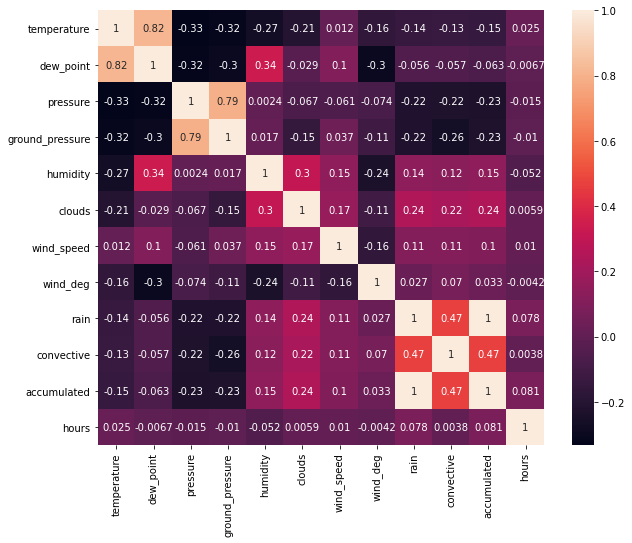

In [13]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot =True); # There are strong correlation betwwen T dew point and pressure groudn pressure

- The features **rain <-> accumulated** are correlated in 0.9999 so accumulated will be dropped. 

- **Temperature <-> dew points and pressure** <-> ground pressure have a correlation of 0.8. By now we maintain them, but will be reevaluated in the next steps.



In [14]:
df.drop(columns=['accumulated'], inplace=True)

In [15]:
df['hours'].value_counts() 


3.0    3176
6.0    2377
Name: hours, dtype: int64

The column 'hour' tells us how for long the rain is forecasted (1 perid of 3 h or 2 period of 3 hour). 

Because of we already have the rain forecasted per 3h period, this column will bring redundant information so we are going to drop it too.

In [16]:
df.drop(columns=['hours'], inplace=True)

In [17]:
df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective', 'Direction N-S', 'Direction E-W',
       'Tarifa_WindGust', 'Tarifa_Wind', 'Tarifa_WindDirection',
       'Tarifa_Direction N-S', 'Tarifa_Direction E-W'],
      dtype='object')

In [18]:
features = ['temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'convective']
targets = ['Tarifa_Wind', 'Tarifa_WindGust','Tarifa_WindDirection']

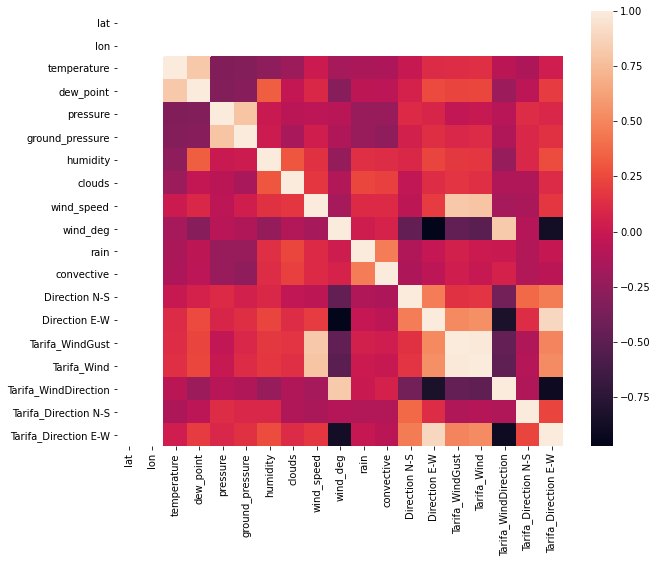

In [19]:
# Just one overall dataframe correlation plot before continuing. 

figure = plt.figure(figsize=(10,8))
sns.heatmap(df.corr()); 

We have this 3 observation, but they are not surprising:

* Wind and wind gust are correlated
* Wind & wind direcitons in features and in targets shall have an relatively high correlation.
* Lat & Long are fixed parameters in the whole dataset. 

In [20]:
df.isna().sum() # we still have this na to be treated!

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
ground_pressure           0
humidity                  0
clouds                  793
wind_speed                0
wind_deg                  0
rain                    120
convective              793
Direction N-S             0
Direction E-W             0
Tarifa_WindGust          29
Tarifa_Wind              19
Tarifa_WindDirection     17
Tarifa_Direction N-S     17
Tarifa_Direction E-W     17
dtype: int64

In [21]:
# We re going to convert to datetime data the column 'slice dt iso'
df['slice dt iso'] = pd.to_datetime(df['slice dt iso'])

In [22]:
df.dtypes

slice dt iso            datetime64[ns]
lat                            float64
lon                            float64
temperature                    float64
dew_point                      float64
pressure                       float64
ground_pressure                float64
humidity                       float64
clouds                         float64
wind_speed                     float64
wind_deg                       float64
rain                           float64
convective                     float64
Direction N-S                  float64
Direction E-W                  float64
Tarifa_WindGust                float64
Tarifa_Wind                    float64
Tarifa_WindDirection           float64
Tarifa_Direction N-S           float64
Tarifa_Direction E-W           float64
dtype: object

## 2 Data distribution exploration

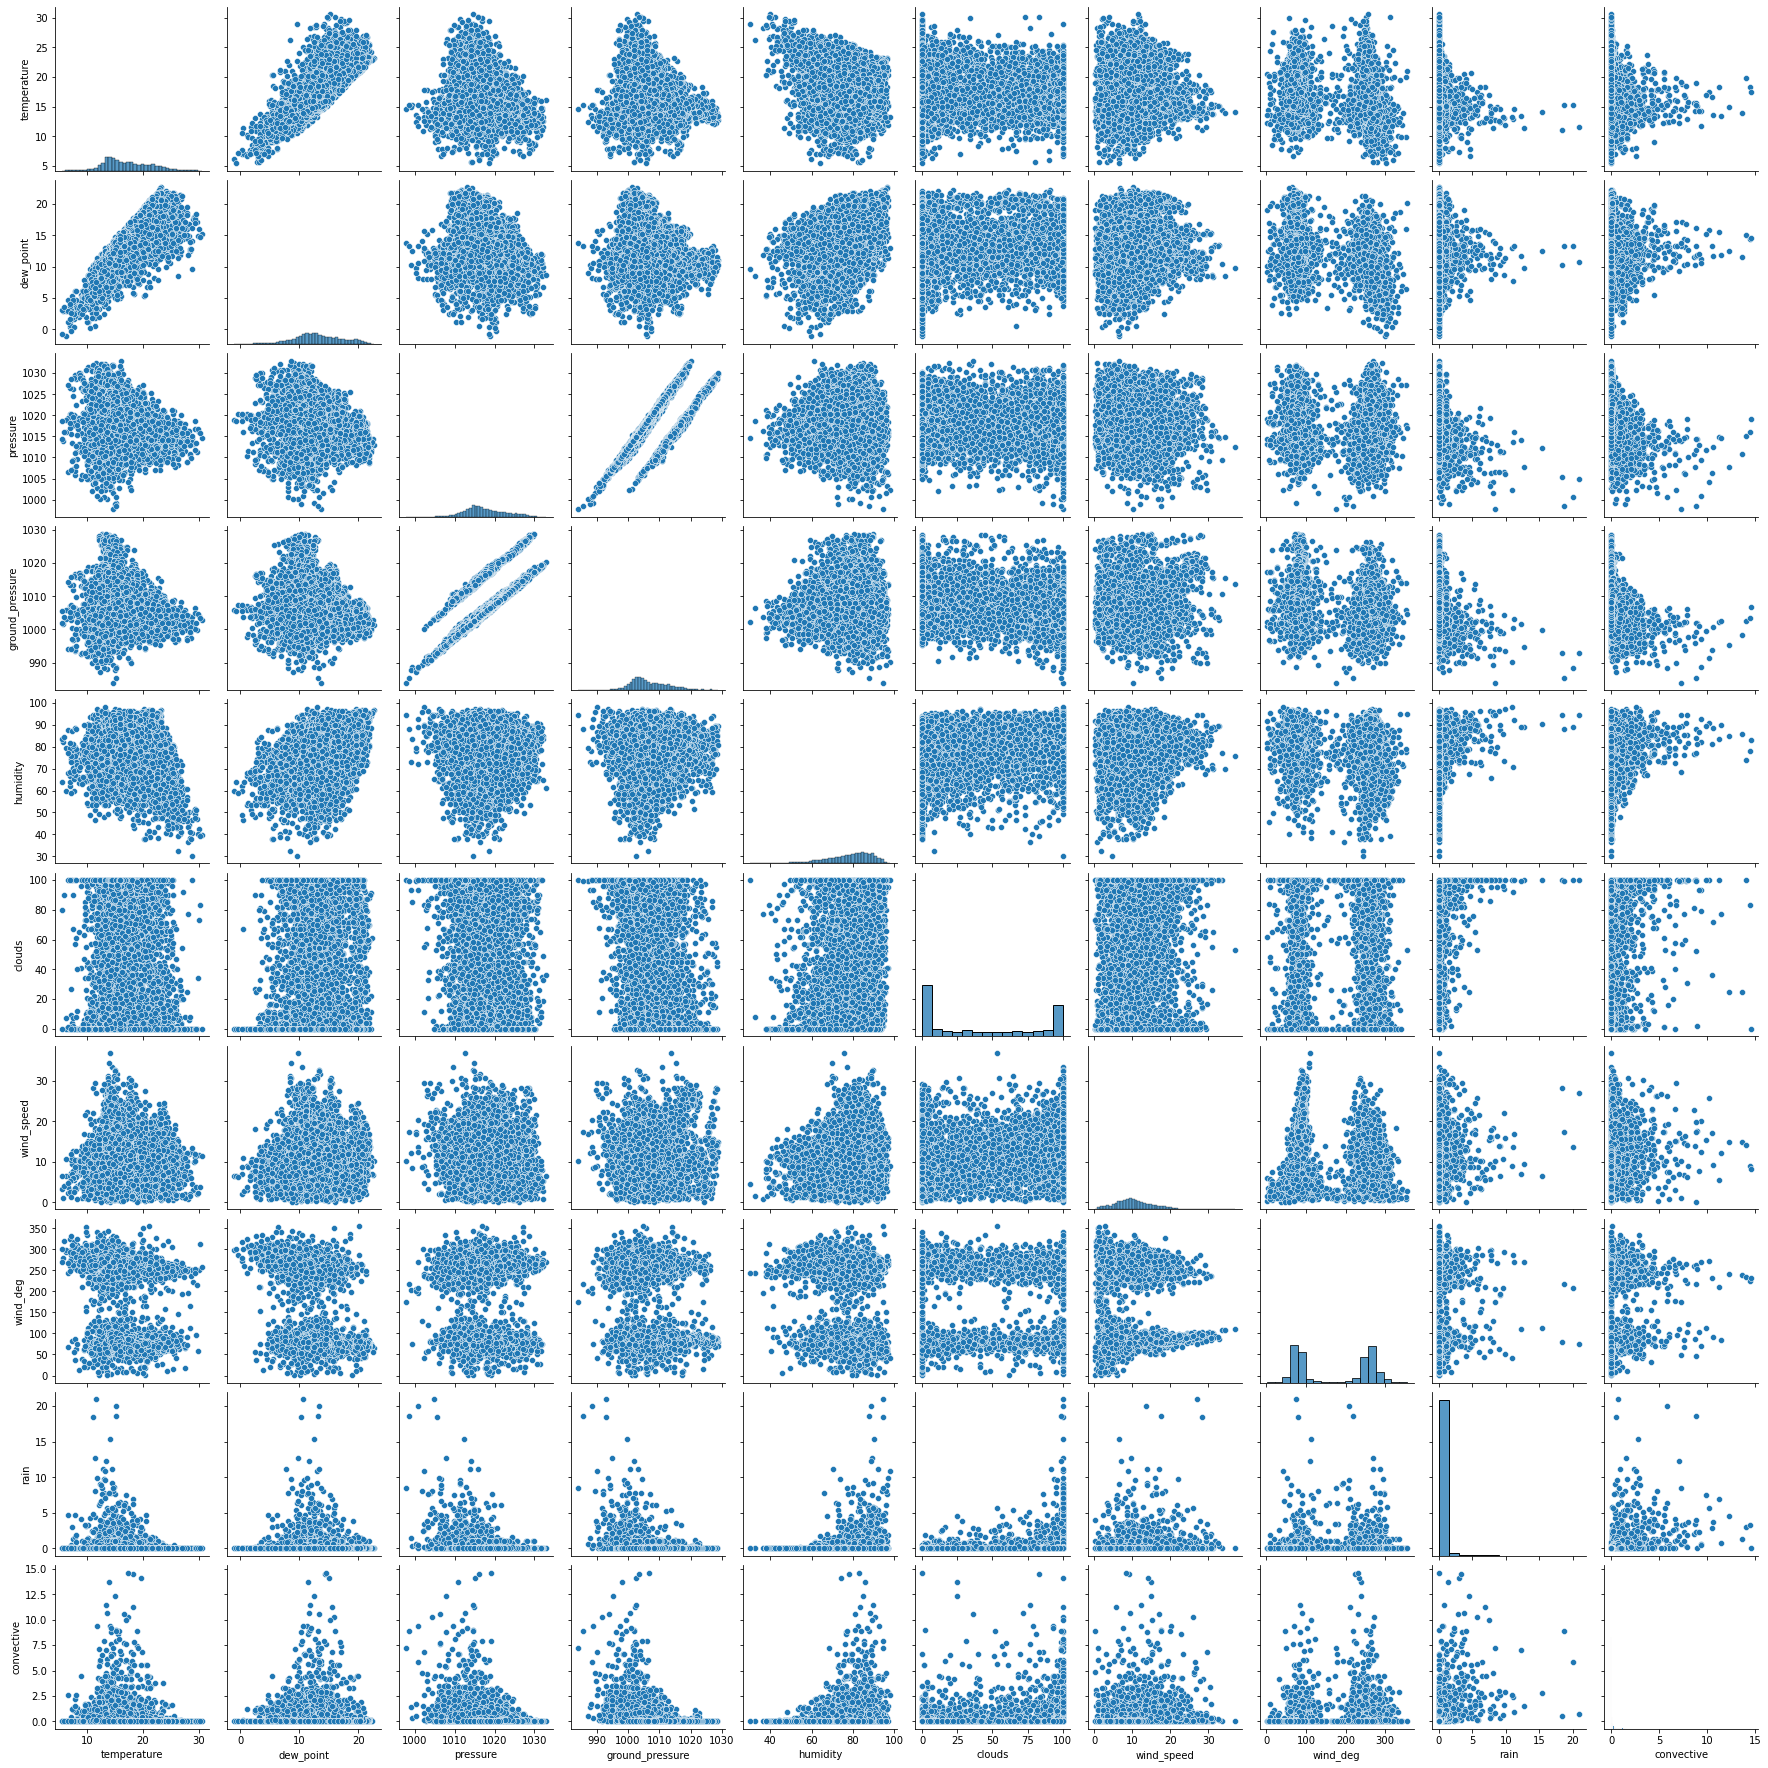

In [23]:
sns.pairplot(df[features]);

In this prelimiary pairplot the main insights that we can collect are:
- Wind direction has a clear clustering around E(90º) and W (180º) what is not so surprising as Tarifa is located at stait of gibraltar and due to its particualr geogrphy is famouse for this two main wind directions so called "poniente"(W) and "levante" (E), what surely is going to be an decisive factor in this project. 
- Clouds might be also an important climatic factor beacause there is a clear clustering characher in the 0% and 100% clouds coverage. 
- We can see the some correlations character between temperature <-> dew point but for now we maintain the two variables. 

- **Regarding pressure and ground pressure we can see a weird behaviour is like linear perfect correlated but in two different lines, let s have a closer look because might be caused by a change in the forecasting model.**


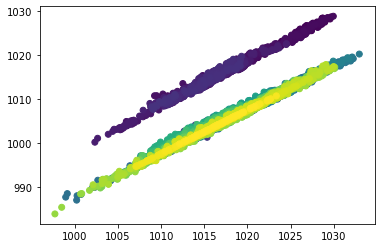

In [24]:
plt.scatter(x = df['pressure'], y= df['ground_pressure'], c=df['slice dt iso']); 

..mmm it seems that there was a time moment were there was that abrupt change.  let s find the exact spot..

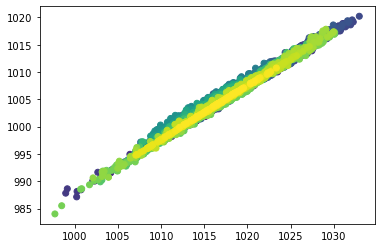

In [25]:
df1 = df[df['slice dt iso']>'2019-09']
plt.scatter(x = df1['pressure'], y= df1['ground_pressure'], c=df1['slice dt iso']);

Definitevely this two variable are perfectly correlated, just there was a change in the criteria about sep.2019. 
Then we can drop one of them (ground pressure) for avoiding perfect correlated variables between featurres that dont add value in our ML project.

In [26]:
df.drop(columns ='ground_pressure', inplace=True)

Let s have a look now in the target variables:

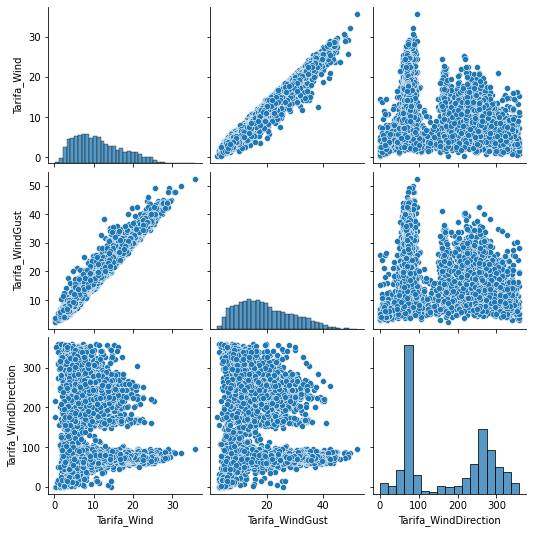

In [27]:
sns.pairplot(df[targets]);

Having a look on the target we can perceive a linearity between wind and the wind gust. 

The relation between wind and gust will can be an indicator of the wind quiality (gustiness), so any finding in this relation is interesting. 

Let see first if there a different slope in the relation when the wind is comming from the E (around 90º) or when is comming from the W (around 270º)

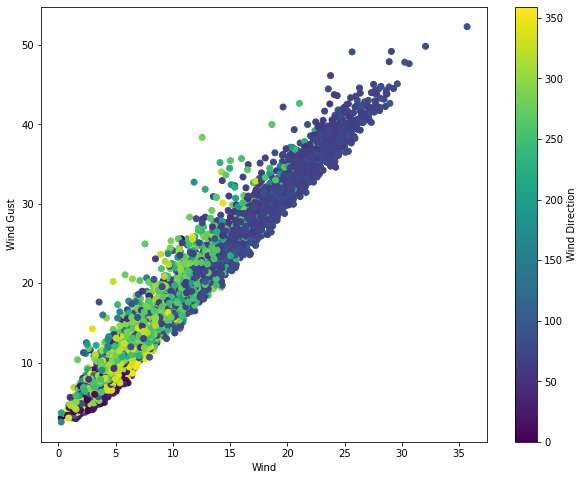

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
z1 = ax.scatter(data=df, x='Tarifa_Wind', y='Tarifa_WindGust', c='Tarifa_WindDirection');
cbar = fig.colorbar(z1, ax=fig.get_axes());
cbar.set_label("Wind Direction");
ax.set_ylabel("Wind Gust");
ax.set_xlabel("Wind");

In the previous graph we can see that the winds from the E (blue) can be stronger than those from the W (green) but we still do not notice a more gusty behavior (steeper slope in the curve).  

Let's see separately how the winds from the east and the winds from the west behave in relation to how they are from the north or south (N/S component in the color map).

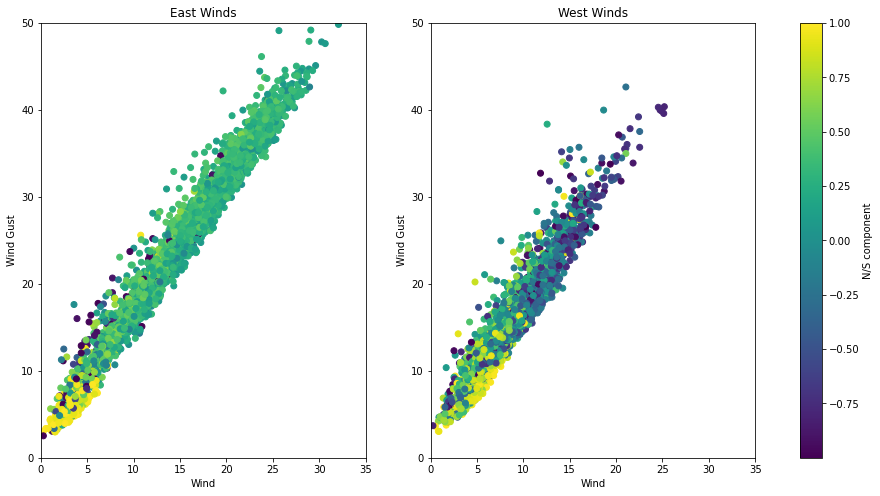

In [29]:
fig, axes = plt.subplots(ncols=2,figsize=(16,8))

z1 = axes[0].scatter(data=df[df['Tarifa_WindDirection']<180], x='Tarifa_Wind', y='Tarifa_WindGust', c='Tarifa_Direction N-S');
z2= axes[1].scatter(data=df[df['Tarifa_WindDirection']>180], x='Tarifa_Wind', y='Tarifa_WindGust', c='Tarifa_Direction N-S');

for ax in axes:
    ax.set_xlim(0,35);
    ax.set_ylim(0,50);
    ax.set_ylabel("Wind Gust");
    ax.set_xlabel("Wind");

axes[0].title.set_text('East Winds');
axes[1].title.set_text('West Winds');

cbar = fig.colorbar(z1, ax=fig.get_axes());
cbar.set_label("N/S component")

A very significant wind gust pattern remains undetected in these figures. This is disappointing because empirical experience tells us that wind coming from the East has more gusts than wind coming from the West and this is especially noticeable when coming from the North (NNE) than when coming from the South (SEE). 

**The explanation why we cannot detect that in these data may be that the data set shows the maximum gust within a time period of 1h/3h, i.e. the absolute maximum gust within that period. Strong winds are known for their rapid variation in a short period of time (e.g. in a 5 minute period the wind can shift 10 knots up and down). This means that with the wind granularity of the data set we can hardly predict wind quality based on the ratio of gust to mean wind, but we will review this later when we apply machine learning methods...**.


## 3 Relation between features (forecast) and actuals mesurements

Let us now look at the accuracy of the predictions based on the current model provided by OpenWeatherdata and the effect of the feature variables on the deviation of the actual measurement versus the predicted wind.
To do this the strategy would be to create a new variable that measures the error between the forecast and the weather station data.  Let's call them delta wind (difference between the forecast wind and the measured wind) and delta N/S W/E components (difference between the forecast direction and the actual direction). 

In [30]:
df['delta_Wind'] = df['Tarifa_Wind']-df['wind_speed']
df['delta_N-S'] = df['Tarifa_Direction N-S'] - df['Direction N-S'] 
df['delta_E-W'] = df['Tarifa_Direction E-W'] - df['Direction E-W']

In [31]:
delta = ['delta_Wind','delta_N-S','delta_E-W']
features = ['temperature', 'dew_point', 'pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg','rain', 'convective']

Let see an overall relation of delta varaibles with all the features. 

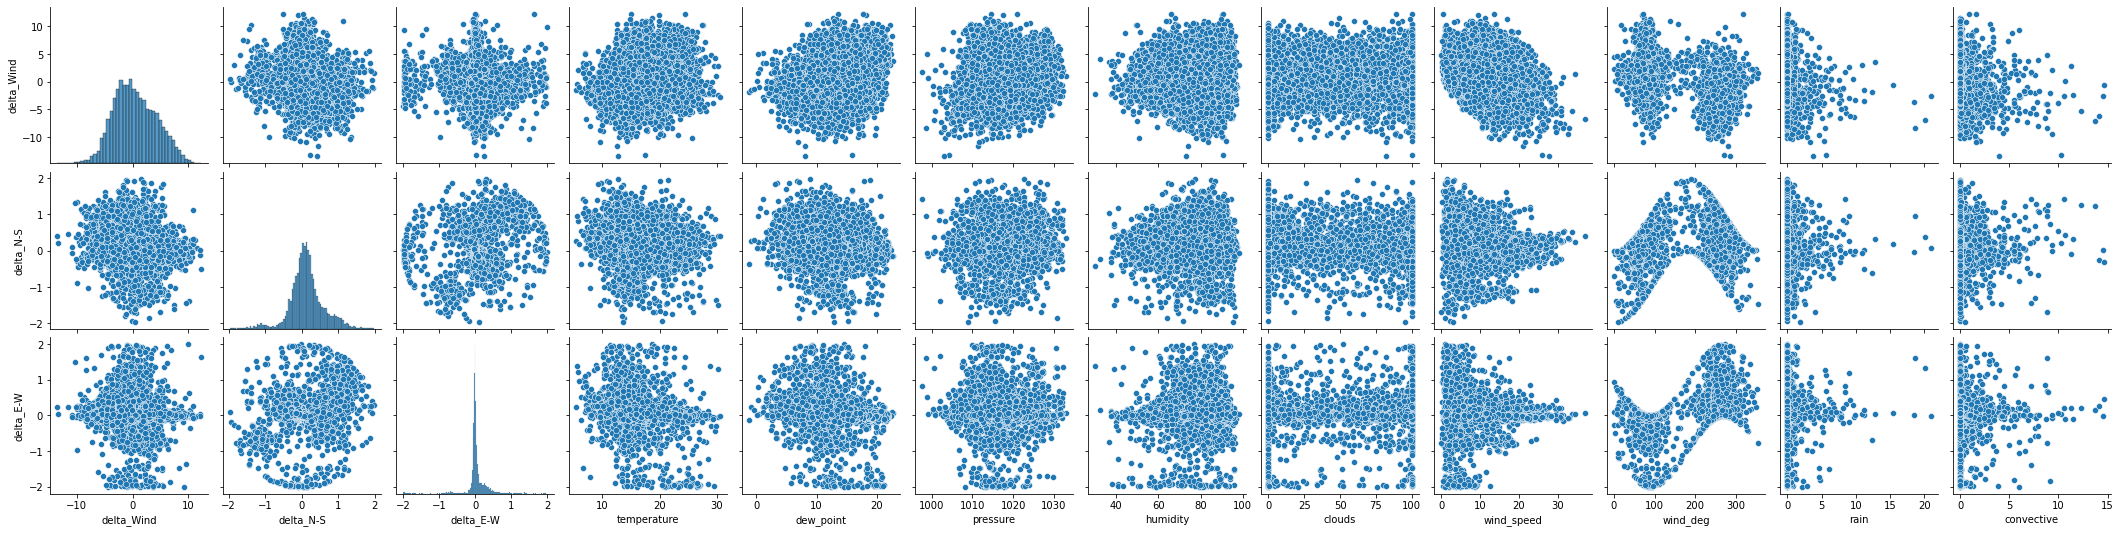

In [32]:
sns.pairplot(pd.concat([df[delta],df[features]],axis =1), y_vars=delta);

let s see now the distribution of dleta wind in detail:

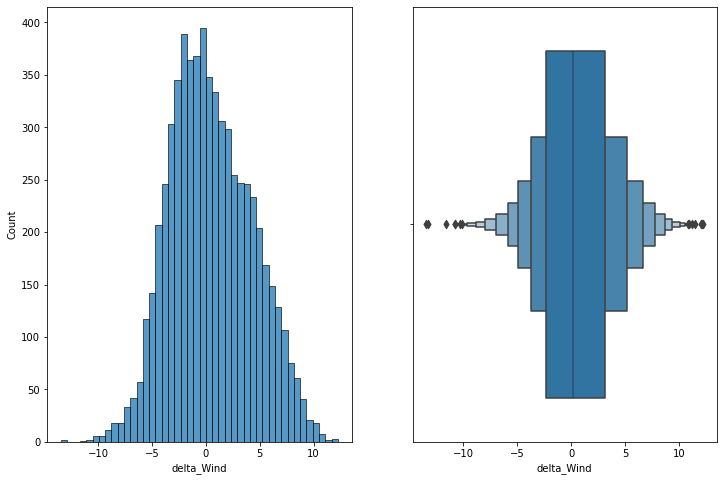

In [33]:
fig, axes = plt.subplots(ncols=2,figsize=(12,8))
sns.histplot(df['delta_Wind'],ax=axes[0]) 
sns.boxenplot(x= df['delta_Wind'], ax=axes[1]);

In [34]:
print ("delta wind mean :", round (df['delta_Wind'].mean(), 4),
       "\ndelta wind Std. :", round(df['delta_Wind'].std(),4),
       "\nmeassured wind Average value :",round(df['Tarifa_Wind'].mean(),4))

delta wind mean : 0.4818 
delta wind Std. : 3.8088 
meassured wind Average value : 11.3398


The delta wind is pretty well centered (mean 0.4818) but the std is relatively high (3,808) for a mean value of measured wind of 11,3398  (thats what we will try to improve).

Let see first how the delta behave related with with wind speed...

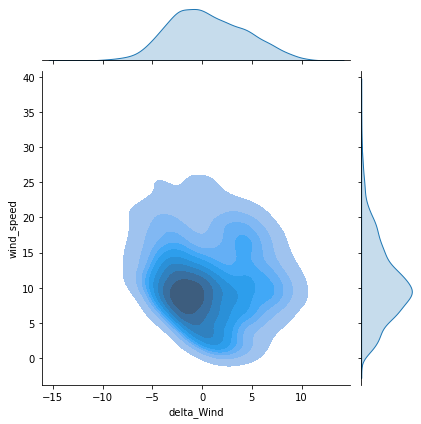

In [35]:
sns.jointplot(y = df['wind_speed'], x = df['delta_Wind'], kind='kde', fill='True')

filtering for wind forecasted under 8 knots...

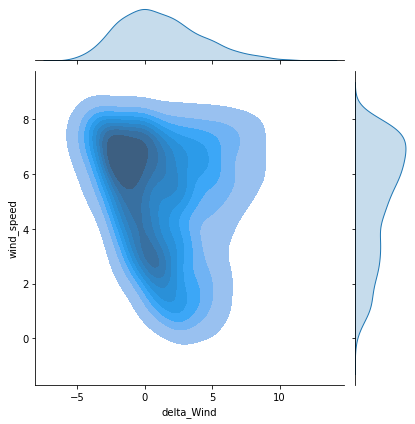

In [36]:
df1=df[df['wind_speed']<8 ]
sns.jointplot(y = df1['wind_speed'], x = df1['delta_Wind'], kind='kde', fill='True');

In [37]:
print('Average delta wind when the wind speed < 8knts : ', round (df['wind_speed'][df['wind_speed']<8].mean(),4))

Average delta wind when the wind speed < 8knts :  5.0932


We can see that when the wind forecasted is light (<8 knots) the bias between forecasted wind and meassured wind pass from 0.4818 to 5.0932, meaning that light wind forecast days the OpenWeather Model understimate the wind signifcantly. 

That is an interesing insight becuase specially when the wind prediction is light those extra 5 knots can be specially decisive to evaluate if the conditions are or not  adequate for water sport activities.

Let s try fo find out if there are some other features factors that can help us predicting when that delta factor is likely to happens.


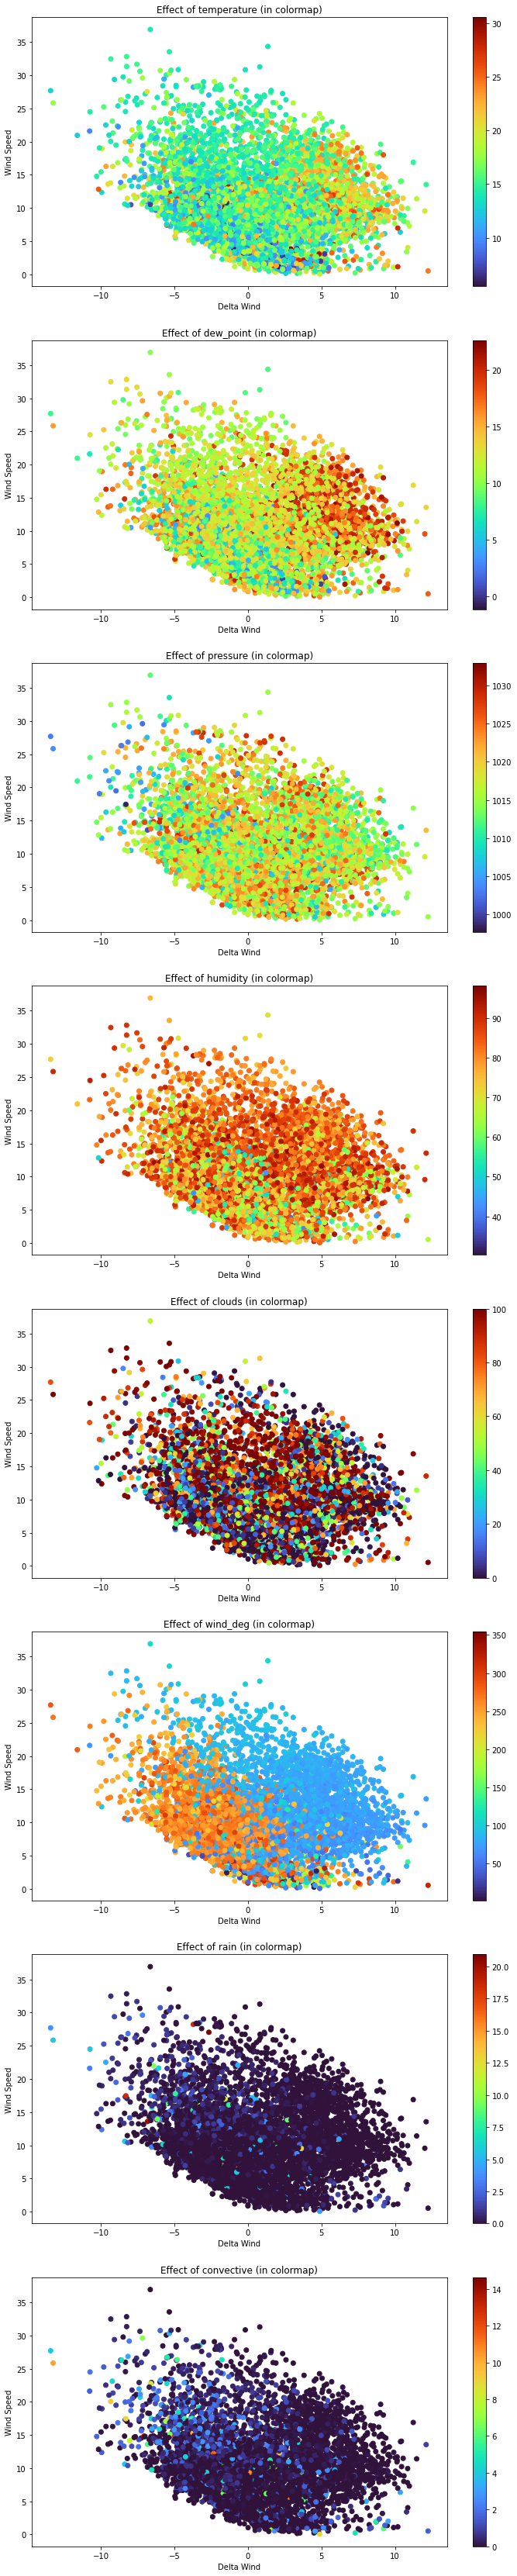

In [38]:
fig, axes = plt.subplots(8, figsize=(12,60))
factors = {0:'temperature',
           1:'dew_point',
           2:'pressure', 
           3:'humidity', 
           4:'clouds',
           5:'wind_deg',
           6:'rain', 
           7:'convective'}

for i in range(0,len(factors)):
    pcm = axes[i].scatter(x=df['delta_Wind'], y=df['wind_speed'], c=df[factors[i]], cmap='turbo')
    axes[i].title.set_text('Effect of ' + factors[i] + ' (in colormap)')
    plt.colorbar(pcm, ax=axes[i])
    axes[i].set_ylabel("Wind Speed");
    axes[i].set_xlabel("Delta Wind");


Here we appreciate two important aspects:

**Temperature/Dew Point:** These two variables (which are highly correlated with each other) significantly affect the delta between forecast and measured wind (high temperature, higher measured wind than expected). **This is very interesting because in our hypothesis the thermal wind created at the coast is hardly predicted by the meteorological models and can significantly affect the actual wind at the coast. 

* Direction:** There is a clear under-prediction of the westerly wind and an over-prediction of the easterly wind. This may occur due to unreliability of the forecast model (which would be a good room for improvement for us) or due to unreliability of the weather station (it is better oriented to measure the easterly wind than the westerly wind). Unfortunately, with the data provided, it is not possible to determine which of the two effects prevails over the other.   


To visualize how the temperature can affect the delta between the predicted and measured wind, let's filter out the days when the temperature is higher than 25 degrees Celsius.

<Figure size 720x576 with 0 Axes>

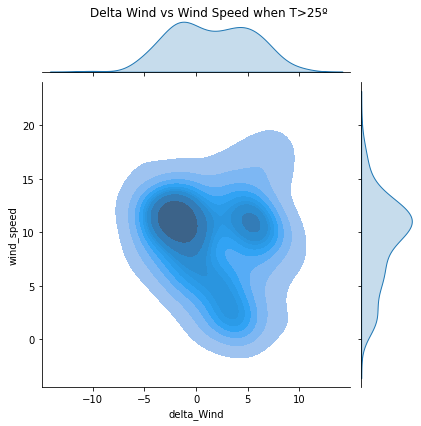

In [39]:
df1 = df[df['temperature']>25];
figure = plt.figure(figsize=(10,8));
z= sns.jointplot(y = df1['wind_speed'], x = df1['delta_Wind'], kind='kde', fill='True');
z.fig.suptitle("Delta Wind vs Wind Speed when T>25º");
z.fig.subplots_adjust(top=0.95);

**A new cluster appears in the +5 knts when temperature is greater than 25º. That s a really interesing insight, with promising results for our machine learning model potential**

Let see what happens between delta variables and the rest of the features when temperature is greater than 25º:


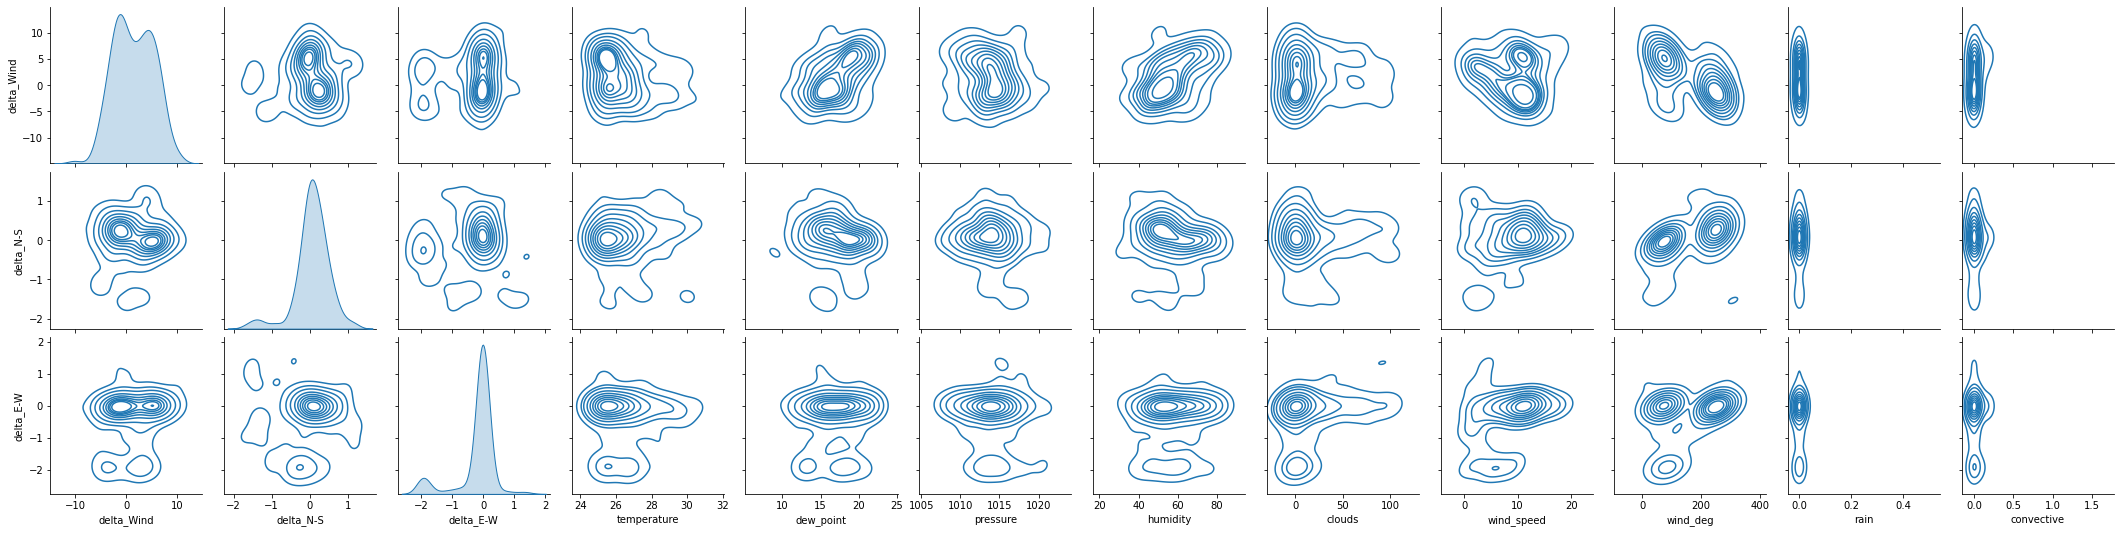

In [40]:
sns.pairplot(pd.concat([df1[delta],df1[features]],axis =1), kind = 'kde', y_vars=delta)

Let s focus just in the relation between delta wind and wind direction that is showing a very clear two clusters:

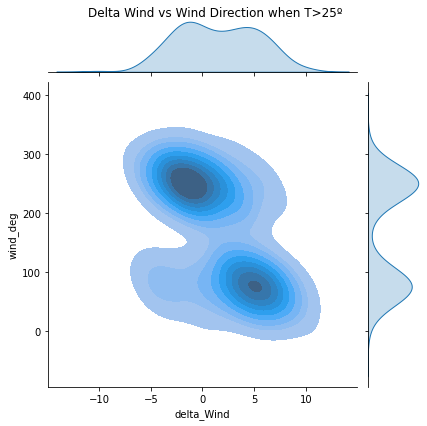

In [41]:
df1 = df[df['temperature']>25]
z= sns.jointplot(y = df1['wind_deg'], x = df1['delta_Wind'], kind='kde', fill='True');

z.fig.suptitle("Delta Wind vs Wind Direction when T>25º");
z.fig.subplots_adjust(top=0.95);

We can interpret this figure to mean that when the wind comes from the E and the Temperature is above 25º, we can expect about +5 knots of the predicted ones. 

**Let's stop doing analysis and let the machine learning model help us.**

## 4 Export dataframe ready for machine learing


In [42]:
df.to_csv('Data/windProject_4ML.csv', index=False)